In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [46]:
df = pd.read_csv("placement.csv")
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [ ]:
#df.values
x=df.iloc[:,0].values
y=df.iloc[:,1].values

Text(0, 0.5, 'Package (in lpa) ')

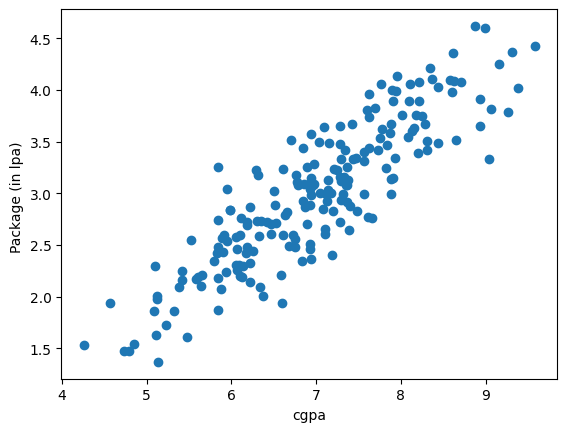

In [51]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('Package (in lpa) ')

In [ ]:
y


,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score



#creat Input and Output Variable
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

#x=df.iloc[:,0].values   #reshape(1,1) then it will work
#y=df.iloc[:,1].values

#create train-test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

#train the model
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

#predit for test data
y_pred=lr_model.predict(x_test)

#evaluate the model
lr_mape=mean_absolute_percentage_error(y_test,y_pred)
lr_mae=mean_absolute_error(y_test,y_pred)
lr_mse=mean_squared_error(y_test,y_pred)
lr_rmse=np.sqrt(lr_mse)
lr_r2_Score=r2_score(y_test,y_pred)

print('lr_MAPE:',lr_mape)
print('lr_MAE:',lr_mae)
print('lr_MSE:',lr_mse)
print('lr_RMSE:',lr_rmse)
print('lr_R2_Score:',lr_r2_Score)


lr_MAPE: 0.1062335673332732
lr_MAE: 0.2884710931878175
lr_MSE: 0.12129235313495527
lr_RMSE: 0.34827051717731616
lr_R2_Score: 0.780730147510384


In [45]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [40]:
x_test.iloc[2].values.reshape(1,1)

array([[5.88]])

In [41]:
lr_model.predict(x_test.iloc[2].values.reshape(1,1))

array([2.38464568])

Text(0, 0.5, 'Package (in lpa) ')

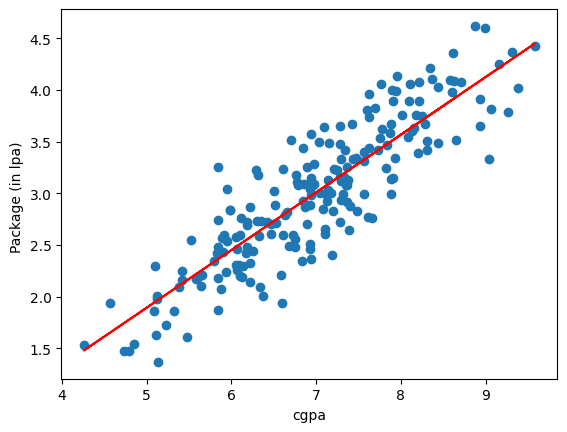

In [56]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr_model.predict(x_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('Package (in lpa) ')

In [57]:
m=lr_model.coef_

In [58]:
m

array([0.55795197])

In [60]:
b=lr_model.intercept_

In [61]:
b

np.float64(-0.8961119222429144)